In [1]:
import sys
import numpy as np
from package.filtredcells import *
from itertools import product
from package.tessellations import *
from matplotlib import colormaps as cm

# Cube Tessellation on Torus 2d

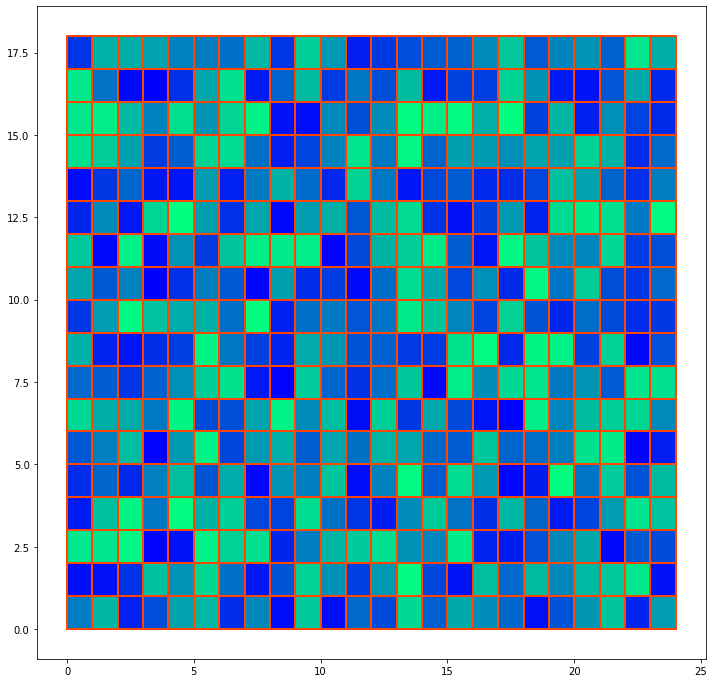

48


In [2]:
n, m = 24, 18
filtration = np.arange(n*m) / (n*m-1)
np.random.shuffle(filtration)
fc = get_cubical_tessellation_on_torus2d(n, m, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

print(sys.getsizeof(fc))

# Hexagonal Tessellation on Torus 2d

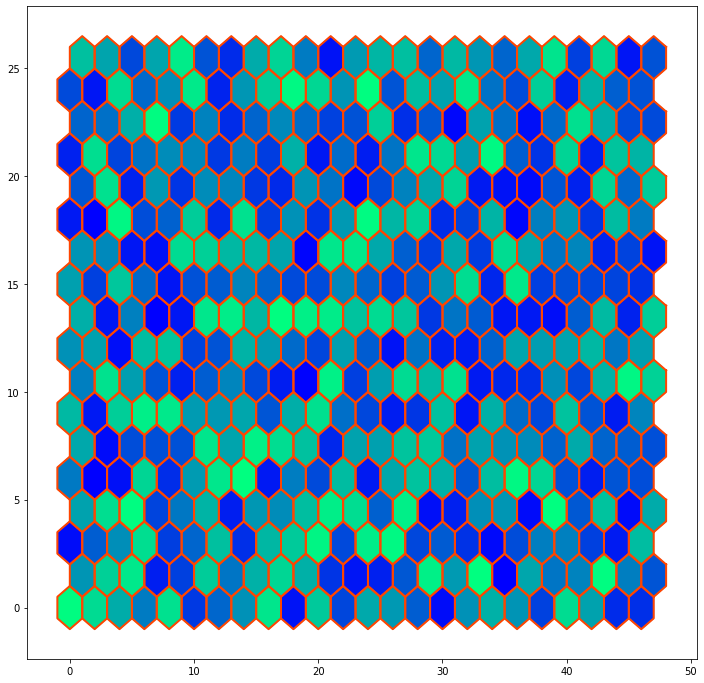

Birth  Dimension
114  0.002694          0
115  0.494794          1
116  0.531198          1
117  0.997747          2

In [3]:
n, m, d = 24, 18, 9
filtration = np.random.random(n*m)
fc = get_hexagonal_tessolation_on_torus2d(n, m, d, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

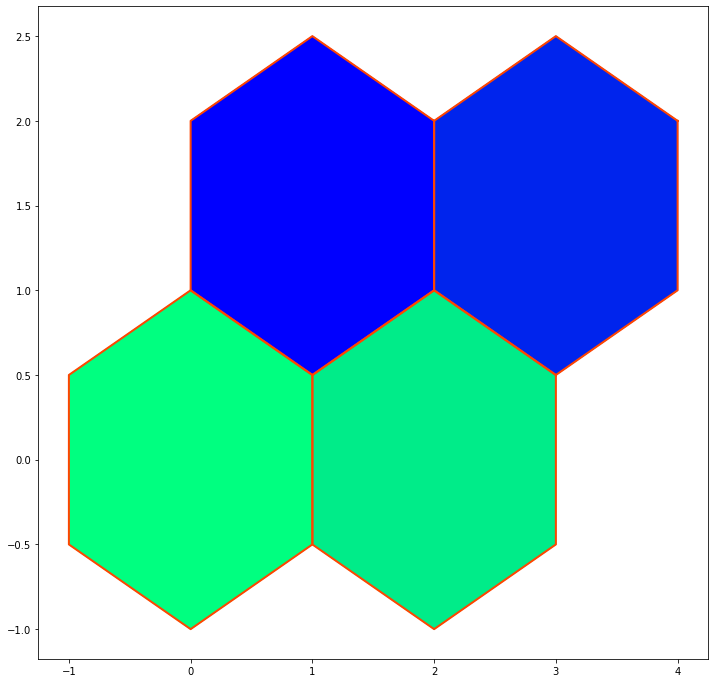

Birth  Dimension
0  0.512905          0
1  0.916284          2
2  0.950371          2
3  0.950371          2
4  0.950371          2
5  0.950371          2

In [4]:
n = 2
filtration = np.random.random(n*n)
fc = get_hexagonal_tessolation_on_torus2d(n, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

# Cube Tessellation on Torus 3d

In [5]:
n, m, k = 10, 10, 10
filtration = np.arange(n*m*k) / (n*m*k)
fc = get_cubical_tessellation_on_torus3d(n, m, k, filtration=filtration)

fc.initialize_complex(dimension=4)
fc.get_giant_cycles()

Birth  Dimension
0  0.000          0
1  0.009          1
2  0.090          1
3  0.099          2
4  0.900          1
5  0.909          2
6  0.990          2
7  0.999          3

# Otcahedron Tessellation on Torus 3d

In [6]:
def get_octehedron_tessellation_on_torus3d(n: int, m=None, k=None, filtration=None):
    """
    Returns FiltredCells for octehedron tessellation on 3-dimensionall torus.
    
    Parameters:
    -----------
    n, m, k: int
        Half sizes of tessellation
        If m is None, that becomes same as n
        If k is None, that becames same as m
    
    filtration : array length 4*n*m*k or None
        Filtration values for cells. If that's None, that becames zeros.
        
    Returns:
    --------
    fc : FiltredCells
    """
    if m is None:
        m = n
    if k is None:
        k = m
    verts = np.array(list(product(np.arange(2*n), np.arange(2*m), np.arange(2*k))))
    verts = verts[verts.sum(axis=1) % 2 == 0]
    unit_cell = np.array([[[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                          [[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                          [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                          [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]], 
                          [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                          [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                          [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                          [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
#    unit_cell = np.array([[[-1,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
#                          [[-1,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
#                          [[-1,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
#                          [[-1,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    cells = np.array([vert + unit_cell for vert in verts])
    cells %= np.array([2*n, 2*m, 2*k])
    cells *= np.array([1, 2*n, 4*n*m])
    cells = cells.sum(axis=-1)
    
    if filtration is None:
        filtration = np.zeros(4*n*m*k)
    fc = FiltredCells(cells, filtration=filtration)
    
    if True:
        if m is None:
            m = n
        if k is None:
            k = m
        cords = []
        unit_cord = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])
        for vert in verts:
            center = np.array([vert[1], vert[2] + (2*k+2)*vert[0]])
            cord = unit_cord + center
            cords.append(cord)
        cords = np.array(cords)
        fc.set_cords(cords)
        # create yticks
        fc.yticks = np.arange(-1, 2*n*(2*k+2))
        fc.ylabels = np.array([(fc.yticks+1) % (2*k+2) - 1, (fc.yticks+1) // (2*k+2)]).transpose()
        
    
    return fc

In [7]:
n, m, k = 3, 3, 3
filtration = np.arange(4*n*m*k) / (4*n*m*k)

#filtration = np.random.random(4*n*m*k)

fc = get_octehedron_tessellation_on_torus3d(n, m, k, filtration=filtration)
fc.initialize_complex(dimension=4)
info = fc.get_cycle_info()
fc.get_giant_cycles()

Birth  Dimension
19   0.000000          0
20   0.018519          1
21   0.111111          1
22   0.157407          2
23   0.194444          2
..        ...        ...
236  0.990741          2
237  0.990741          2
238  0.990741          2
239  0.990741          2
240  0.990741          2

[222 rows x 2 columns]

/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


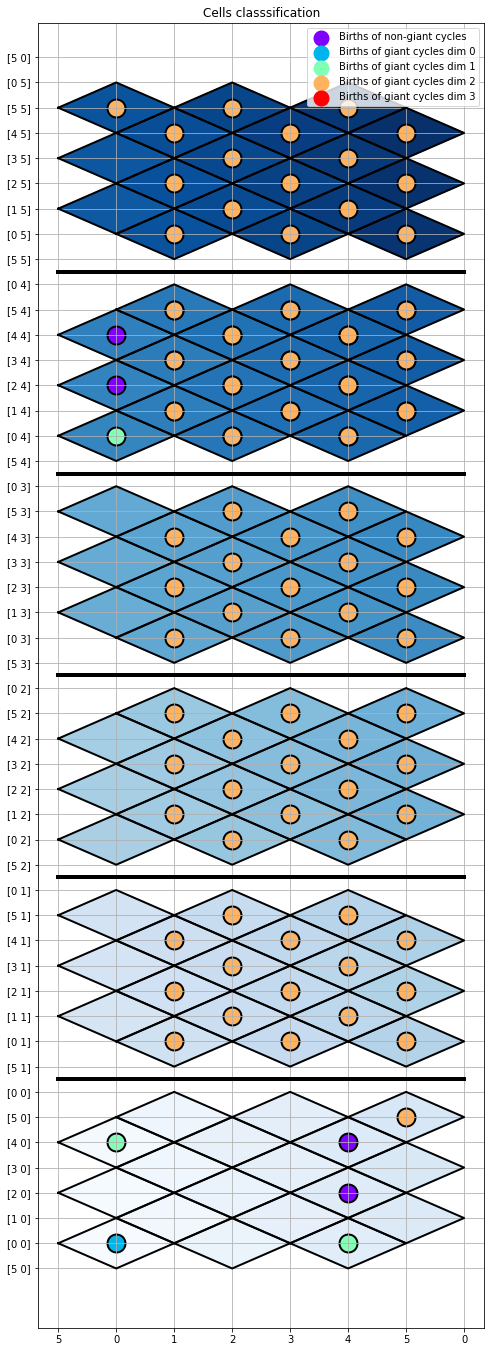

In [8]:
plt.figure(figsize=(8, 24))
fc.draw_filtration(colormap='Blues', edgecolor='black')
plt.title('Cells classsification')

plt.xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
plt.yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

colors = np.arange(5)/4
colors = [cm['rainbow'](i) for i in colors]

x, y = fc.cords[np.isin(filtration, info[(info['Death'] != np.inf)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[0], linewidth=10, label='Births of non-giant cycles')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[1], linewidth=10, label='Births of giant cycles dim 0')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[2], linewidth=10, label='Births of giant cycles dim 1')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[3], linewidth=10, label='Births of giant cycles dim 2')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[4], linewidth=10, label='Births of giant cycles dim 3')

for i in range(2*n - 1):
    plt.plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
plt.legend()
plt.grid(True)
plt.show()

In [9]:
print('Nongiant cycles:', len(info[info['Death'] != np.inf]))
print('Giant cycles dim 0:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]))
print('Giant cycles dim 1:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]))
print('Giant cycles dim 2:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]))
print('Giant cycles dim 3:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]))

Nongiant cycles: 19
Giant cycles dim 0: 1
Giant cycles dim 1: 3
Giant cycles dim 2: 218
Giant cycles dim 3: 0


In [10]:
info2 = info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values
info2 = pd.DataFrame([[i,(info2 == i).sum()] for i in np.unique(info2)], columns=['Birth', 'Count'])
info2.groupby('Count').count().transpose()

Count  1   2   4  5  7
Birth  2  48  21  3  3

In [11]:
assert (info2.groupby('Count').count().index.values * info2.groupby('Count').count()['Birth'].values).sum() == len(info[(info['Death'] == np.inf)&(info['Dimension'] == 2)])

/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


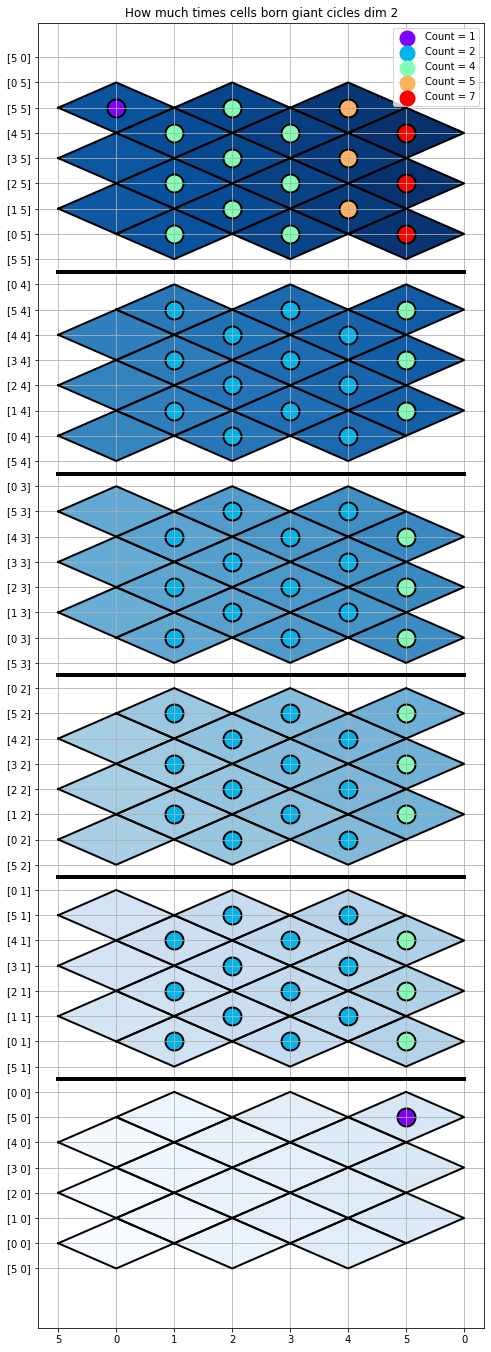

In [12]:
plt.figure(figsize=(8, 24))
plt.title('How much times cells born giant cicles dim 2')
fc.draw_filtration(colormap='Blues', edgecolor='black')

plt.xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
plt.yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

counts = np.unique(info2['Count'])
colors = np.arange(len(counts)) / max(1, len(counts)-1)
colors = [cm['rainbow'](i) for i in colors]
for i in range(len(counts)):
    x, y = fc.cords[np.isin(filtration, info2[(info2['Count'] == counts[i])]['Birth'].values)].mean(axis=1).transpose()
    plt.scatter(x, y, color='black', linewidth=14)
    plt.scatter(x, y, facecolor=colors[i], linewidth=10, label='Count = {0}'.format(counts[i]))

for i in range(2*n - 1):
    plt.plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
plt.legend()
plt.grid(True)
plt.show()